In [13]:
file_path = 'C:/Users/ashar/Downloads/Demographics Information - Human Participants (2).csv'


In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import kruskal

In [15]:
# Read the CSV file into a Pandas DataFrame
data = pd.read_csv(file_path)

Non-numeric values in the 'Total N' column:
[nan]


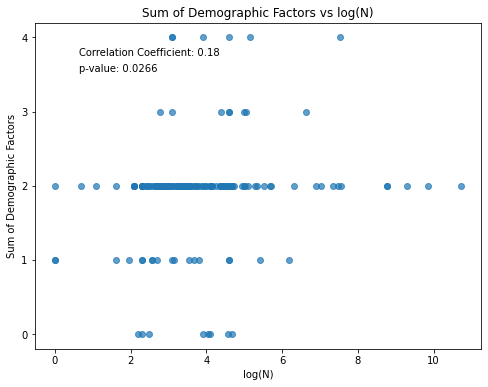

In [16]:
# Assuming the column names are 'Demographic_Factor_1', 'Demographic_Factor_2', etc.
# Replace these with your actual column names
demographic_columns = ['Race Present', 'Ethnicity Present', 'Age Present', 'Sex Present']  # Add all your demographic columns

# Sum the demographic factors for each row
data['Sum_Demographic_Factors'] = data[demographic_columns].sum(axis=1)

data['Total N'] = pd.to_numeric(data['Total N'], errors='coerce')

# Check for any other non-numeric values after converting 'X' to NaN
non_numeric_values = data[pd.to_numeric(data['Total N'], errors='coerce').isnull()]

if not non_numeric_values.empty:
    print("Non-numeric values in the 'Total N' column:")
    print(non_numeric_values['Total N'].unique())

# Drop rows where 'Total N' column contains 'X' or NaN
data = data[(data['Total N'] != 'X') & (~data['Total N'].isnull())]

# Convert 'Total N' column to numeric after removing 'X' and NaN values
data['Total N'] = pd.to_numeric(data['Total N'], errors='coerce')

# Check for any remaining NaN values after dropping 'X' and NaN and converting to numeric
if data['Total N'].isnull().values.any():
    print("There are still non-numeric values in the 'Total N' column after dropping 'X' and NaN values.")
else:
    data['Log_N'] = np.log(data['Total N'])

# List of columns to drop
#columns_to_drop = ['location', 'other_column']  # Add other columns you want to drop

# Drop the columns not needed
#data = data.drop(columns=columns_to_drop)

plt.figure(figsize=(8, 6))
plt.scatter(data['Log_N'], data['Sum_Demographic_Factors'], alpha=0.7)
plt.title('Sum of Demographic Factors vs log(N)')
plt.xlabel('log(N)')
plt.ylabel('Sum of Demographic Factors')
#plt.grid(True)

# Calculate correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(data['Log_N'], data['Sum_Demographic_Factors'])
corr_coeff_str = f'Correlation Coefficient: {correlation_coefficient:.2f}'
p_value_str = f'p-value: {p_value:.4f}'
plt.text(0.1, 0.9, corr_coeff_str, transform=plt.gca().transAxes)
plt.text(0.1, 0.85, p_value_str, transform=plt.gca().transAxes)



# Set y-axis ticks to include only integer values
plt.yticks(np.arange(0, 5, 1))  # Adjust range according to your data

plt.show()

In [17]:
# Convert demographic variables to numeric if they're not already
demographic_cols = ['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present']
data[demographic_cols] = data[demographic_cols].apply(pd.to_numeric, errors='coerce')

# Group by 'Country/Region' and sum the demographic variables
demographic_by_country = data.groupby('Country/Region')[demographic_cols].sum()

# Display the table
demographic_by_country
# Export to Excel
country_demographics_excel = 'demographic_by_country.xlsx'
demographic_by_country.to_excel(country_demographics_excel)

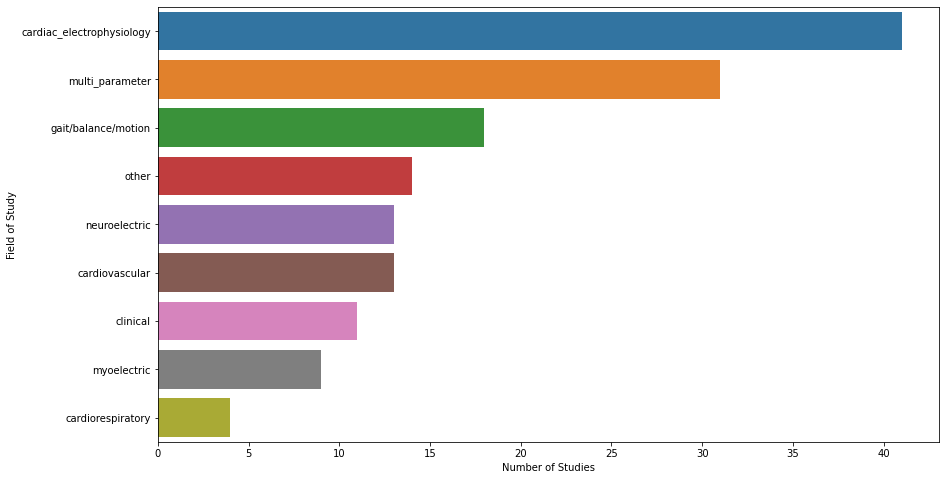

cardiac_electrophysiology    41
multi_parameter              31
gait/balance/motion          18
other                        14
neuroelectric                13
cardiovascular               13
clinical                     11
myoelectric                   9
cardiorespiratory             4
Name: Field, dtype: int64


In [18]:
#Counting the number of studies in each field
field_counts = data['Field'].value_counts()

# Converting the counts to a DataFrame for easier plotting
field_counts_df = field_counts.reset_index()
field_counts_df.columns = ['Field', 'Number of Studies']

# Plotting the horizontal bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Studies', y='Field', data=field_counts_df)

#plt.title('Number of Studies in Each Clinical Area of Interest')
plt.xlabel('Number of Studies')
plt.ylabel('Field of Study')

plt.show()
print(field_counts)

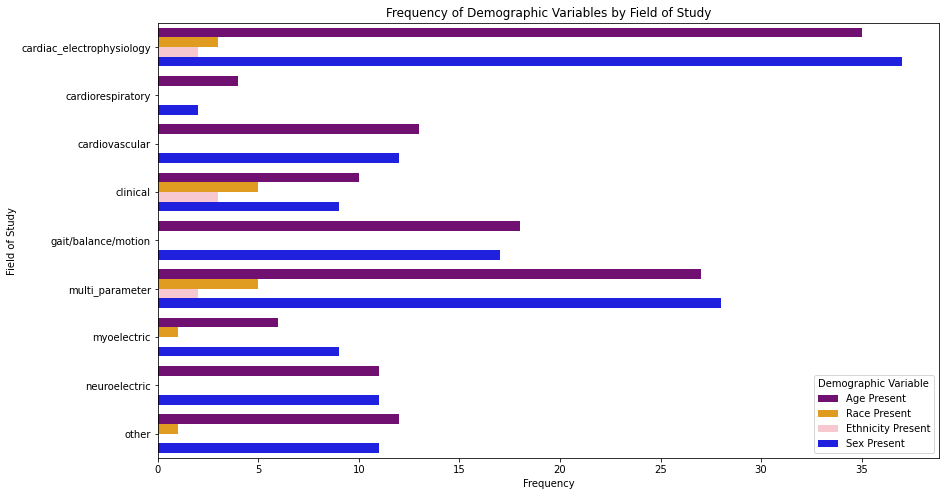

In [19]:
# Ensuring the binary columns are of numeric type for correct summation
data['Age Present'] = pd.to_numeric(data['Age Present'], errors='coerce')
data['Race Present'] = pd.to_numeric(data['Race Present'], errors='coerce')
data['Ethnicity Present'] = pd.to_numeric(data['Ethnicity Present'], errors='coerce')
data['Sex Present'] = pd.to_numeric(data['Sex Present'], errors='coerce')

# Grouping and summing the data
grouped_data = data.groupby('Field').sum()[['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present']]

# Melting the grouped data for plotting
melted_data = pd.melt(grouped_data.reset_index(), id_vars=["Field"],
                      value_vars=['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present'],
                      var_name='Demographic Variable', value_name='Frequency')


# Define a color palette
palette = {"Age Present": "purple", "Race Present": "orange", "Ethnicity Present": "pink", "Sex Present": "blue"}

# Plotting the grouped horizontal bar chart
plt.figure(figsize=(14, 8))
sns.barplot(x='Frequency', y='Field', hue='Demographic Variable', data=melted_data, palette = palette)

plt.title('Frequency of Demographic Variables by Field of Study')
plt.xlabel('Frequency')
plt.ylabel('Field of Study')
plt.legend(title='Demographic Variable')

plt.show()

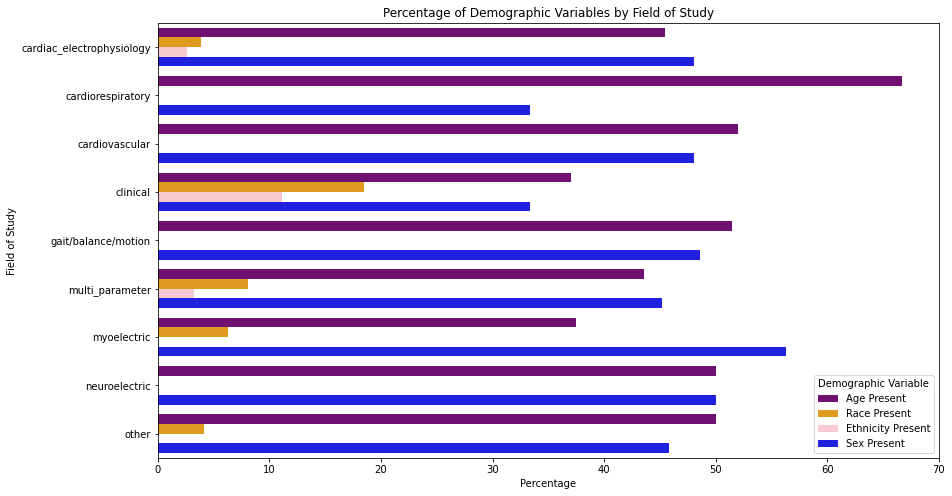

In [20]:
# Convert to numeric if not already
data['Age Present'] = pd.to_numeric(data['Age Present'], errors='coerce')
data['Race Present'] = pd.to_numeric(data['Race Present'], errors='coerce')
data['Ethnicity Present'] = pd.to_numeric(data['Ethnicity Present'], errors='coerce')
data['Sex Present'] = pd.to_numeric(data['Sex Present'], errors='coerce')

# Grouping and summing the data
grouped_data = data.groupby('Field').sum()[['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present']]

# Calculate total counts per field for normalization
grouped_data['Total'] = grouped_data.sum(axis=1)

# Convert counts to percentages
for col in ['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present']:
    grouped_data[col] = (grouped_data[col] / grouped_data['Total']) * 100

# Melting the grouped data for plotting
melted_data = pd.melt(grouped_data.reset_index(), id_vars=["Field"],
                      value_vars=['Age Present', 'Race Present', 'Ethnicity Present', 'Sex Present'],
                      var_name='Demographic Variable', value_name='Percentage')

# Define a color palette
palette = {"Age Present": "purple", "Race Present": "orange", "Ethnicity Present": "pink", "Sex Present": "blue"}

# Plotting the grouped horizontal bar chart with custom colors
plt.figure(figsize=(14, 8))
sns.barplot(x='Percentage', y='Field', hue='Demographic Variable', data=melted_data, palette=palette)

plt.title('Percentage of Demographic Variables by Field of Study')
plt.xlabel('Percentage')
plt.ylabel('Field of Study')
plt.legend(title='Demographic Variable')

plt.show()

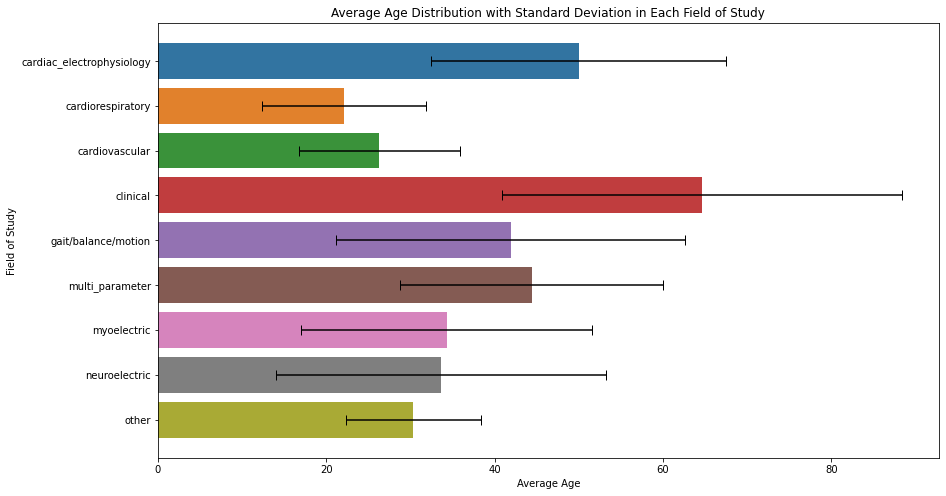

In [21]:
# Convert 'Average Age' to numeric, handling non-numeric entries
data['Average Age'] = pd.to_numeric(data['Average Age'], errors='coerce')

# Exclude rows where 'Average Age' is NaN
data_filtered = data[data['Average Age'].notna()]

# Group by 'Field' and calculate mean and standard deviation
age_stats = data_filtered.groupby('Field')['Average Age'].agg(['mean', 'std'])

# Resetting the index to make 'Field' a column again
age_stats.reset_index(inplace=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='Field', data=age_stats, ci=None)

# Adding error bars for standard deviation
for i, row in age_stats.iterrows():
    plt.errorbar(row['mean'], i, xerr=row['std'], fmt='none', color='black', capsize=5)

plt.title('Average Age Distribution with Standard Deviation in Each Field of Study')
plt.xlabel('Average Age')
plt.ylabel('Field of Study')

plt.show()

In [22]:
# Convert 'Average Age' to numeric, handling non-numeric entries
data['Average Age'] = pd.to_numeric(data['Average Age'], errors='coerce')

# Grouping the data and filtering out groups with fewer than 2 non-NaN values
grouped_data = data.groupby("Field")
age_lists = [group["Average Age"].dropna().values for name, group in grouped_data if len(group["Average Age"].dropna()) >= 2]

# Check if there are enough groups for the test
if len(age_lists) > 1:
    # Perform the Kruskal-Wallis Test
    stat, p = kruskal(*age_lists)
    print("Kruskal-Wallis Test statistic:", stat)
    print("P-value:", p)

    # Interpretation of the result
    alpha = 0.05
    if p < alpha:
        print("There is a statistically significant difference between the groups.")
    else:
        print("There is no statistically significant difference between the groups.")
else:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")

Kruskal-Wallis Test statistic: 22.53473831671425
P-value: 0.004015876965967535
There is a statistically significant difference between the groups.


In [23]:
# Step 1: Filter out rows where 'Male' or 'Female' column has 'X'
data_without_X = data[(data['Male'] != 'X') & (data['Female'] != 'X')]
# Define the list of titles to be excluded
exclude_titles = [
    "Fetal ECG Synthetic Database",
    "MMG Database v1.0.0",
    "Non-Invasive Fetal ECG Arrhythmia Database",
    "Non-Invasive Fetal ECG Database",
    "Fetal PCG Database",
    "Term-Preterm EHG DataSet with Tocogram",
    "Term-Preterm EHG Database",
    "NInFEA: Non-Invasive Multimodal Foetal ECG-Doppler Dataset for Antenatal Cardiology Research",
    "Icelandic 16-electrode Electrohysterogram Database",
    "Indian Institute of Science Fetal Heart Sound Database (IIScFHSDB)",
    "Shiraz University Fetal Heart Sounds Database",
    "Visceral adipose tissue measurements during pregnancy",
    "CTU-CHB Intrapartum Cardiotocography Database",
    "Abdominal and Direct Fetal ECG Database",
    "OB-1 Fetal ECG Database",
    "Simulated Fetal Phonocardiograms"
]
# Step 2: Filter out rows with specified titles in 'Study Name'
filtered_data = data_without_X[~data_without_X['Study Name'].isin(exclude_titles)]

C:\Users\ashar\AppData\Local\Temp\ipykernel_105168\2638648023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[cols_to_convert] = filtered_data[cols_to_convert].apply(pd.to_numeric, errors='coerce', downcast='float')
C:\Users\ashar\AppData\Local\Temp\ipykernel_105168\2638648023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Total'] = filtered_data['Male'] + filtered_data['Female'] + filtered_data['Unknown / Not Reported']
C:\Users\ashar\AppData\Local\Temp\ipykernel_10516

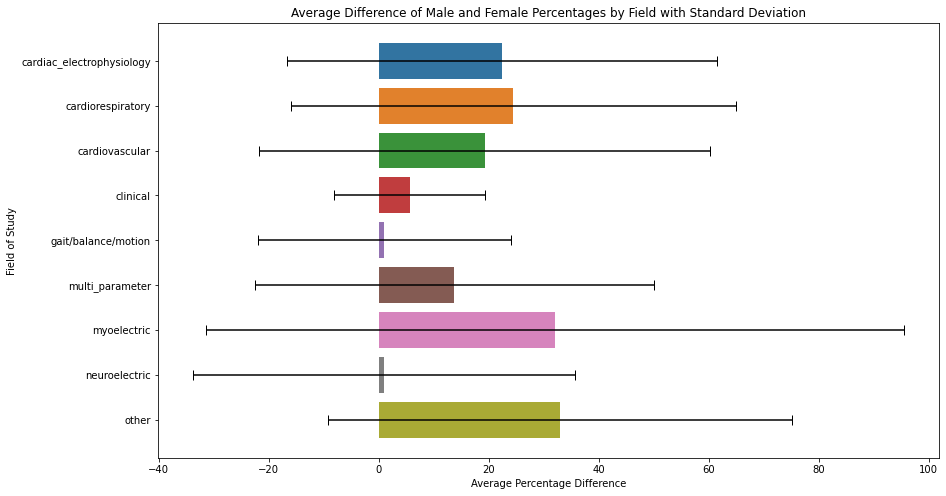

In [24]:
# Convert necessary columns to numeric
cols_to_convert = ['Male', 'Female', 'Unknown / Not Reported']
filtered_data[cols_to_convert] = filtered_data[cols_to_convert].apply(pd.to_numeric, errors='coerce', downcast='float')

# Calculate the total for the denominator
filtered_data['Total'] = filtered_data['Male'] + filtered_data['Female'] + filtered_data['Unknown / Not Reported']

# Calculate percentage of Males and Females
filtered_data['% Male'] = (filtered_data['Male'] / filtered_data['Total']) * 100
filtered_data['% Female'] = (filtered_data['Female'] / filtered_data['Total']) * 100

# Calculate the percentage difference
filtered_data['% Difference'] = filtered_data['% Male'] - filtered_data['% Female']

# Group by 'Field' and calculate mean and standard deviation of the percentage difference
field_stats = filtered_data.groupby('Field')['% Difference'].agg(['mean', 'std'])

# Reset index for easier plotting
field_stats.reset_index(inplace=True)

# Plotting the horizontal bar graph
plt.figure(figsize=(14, 8))
sns.barplot(x='mean', y='Field', data=field_stats, ci=None)

# Adding error bars for standard deviation
for i, row in field_stats.iterrows():
    plt.errorbar(row['mean'], i, xerr=row['std'], fmt='none', color='black', capsize=5)

plt.title('Average Difference of Male and Female Percentages by Field with Standard Deviation')
plt.xlabel('Average Percentage Difference')
plt.ylabel('Field of Study')

plt.show()

In [25]:
# Creating a list of percentage differences for each field
percentage_diff_lists = [group['% Difference'].dropna().values for name, group in filtered_data.groupby('Field')]

# Perform the Kruskal-Wallis Test
# Ensure there are at least two groups with more than one observation each
if len(percentage_diff_lists) > 1 and all(len(lst) > 1 for lst in percentage_diff_lists):
    stat, p = kruskal(*percentage_diff_lists)
    print("Kruskal-Wallis Test statistic:", stat)
    print("P-value:", p)

    # Interpret the result
    alpha = 0.05
    if p < alpha:
        print("There is a statistically significant difference between the groups.")
    else:
        print("There is no statistically significant difference between the groups.")
else:
    print("Not enough data for Kruskal-Wallis test.")

Kruskal-Wallis Test statistic: 9.444596307723433
P-value: 0.30618837343082195
There is no statistically significant difference between the groups.
